In [20]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [39]:
def Lmat(h, r0, M, N, epsilon_0=8.854e-12):
    """
    Compute the capacitance per unit length of a metallic cylinder using moment method.
    :param h: Height of the cylinder
    :param r0: Radius of the cylinder
    :param M: Number of subsections along circumference
    :param N: Number of subsections along height
    :param epsilon_0: Permittivity of free space (default: 8.854e-12 F/m)
    :return: Capacitance per unit length (F/m)
    """
    MN = M * N  # Total number of subsections
    L_matrix = np.zeros((MN, MN))
    
    for m in range(MN):
        for n in range(MN):
            if m != n:
                sn=2*np.pi*r0*h/MN
                theta_m, theta_n = (2 * np.pi * (m % M) / M, 2 * np.pi * (n % M) / M)
                z_m, z_n = ((m // M) * h / N, (n // M) * h / N)
                
                distance = np.sqrt((2 * r0 * np.sin((theta_m - theta_n) / 2))**2 + (z_m - z_n)**2)
                L_matrix[m, n] = sn / (4 * np.pi * epsilon_0 * distance)
            else:
                a=(2*np.pi*r0)/M
                b=h/N
                temp1=b+(math.pow(a,2)+math.pow(b,2))**0.5
                temp2=-b+(math.pow(a,2)+math.pow(b,2))**0.5
                temp3=a*math.log(temp1/temp2)
                temp4=a+(math.pow(a,2)+math.pow(b,2))**0.5
                temp5=-a+(math.pow(a,2)+math.pow(b,2))**0.5
                temp6=b*math.log(temp1/temp2)
                L_matrix[m, n] =(temp3+temp6)/(4 * np.pi * epsilon_0)
    
    #L_inv = np.linalg.inv(L_matrix)
    #capacitance = np.sum(L_inv)
    
    return L_matrix  # Capacitance per unit length

In [61]:
def alpha(h, r0, M, N):
    MN=M*N
    L=Lmat(h, r0, M, N)
    L_inv = np.linalg.inv(L)
    V = np.ones((MN, 1))
    al=np.dot(L_inv,V)
    return al

In [67]:
def compute_capacitance_per_unit_length(h,r0,M,N):
    MN=M*N
    sn=2*np.pi*r0*h/MN
    al=alpha(h,r0,M,N)
    q=0
    for i in range(M*N):
        q+=al[i][0]*sn
    return q/h

In [88]:
X=[]
Y=[]
for h,r0,M,N in[
    (2,1,11,9),
    (4,1,9,11),
    (12,1,9,13),
    (40,1,10,30),
    (120,1,10,40)
]:
    cap_per_unit_length = compute_capacitance_per_unit_length(h, r0, M, N)
    print(f"Capacitance per unit length: {cap_per_unit_length * 1e12:.4f} pF/m")
    X.append(h/r0)
    Y.append(cap_per_unit_length)

Capacitance per unit length: 65.0792 pF/m
Capacitance per unit length: 45.0206 pF/m
Capacitance per unit length: 24.6352 pF/m
Capacitance per unit length: 15.6042 pF/m
Capacitance per unit length: 9.9332 pF/m


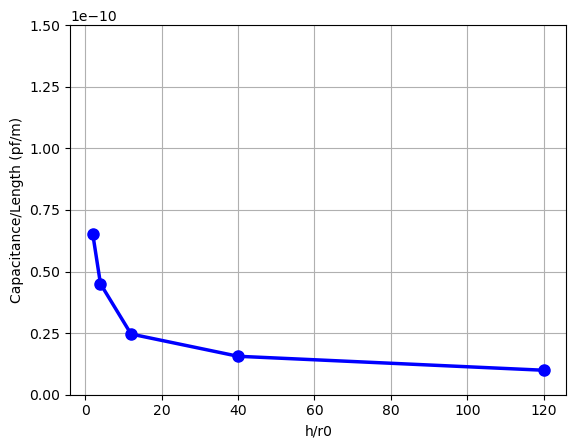

In [96]:
plt.plot(X, Y, linestyle='-', linewidth=2.5, marker='o', markersize=8, color='blue', label='Data Points')
plt.xlabel("h/r0")
plt.ylabel("Capacitance/Length (pf/m)")
plt.yticks([0e-12,25e-12,50e-12,75e-12,100e-12,125e-12,150e-12])
plt.grid()
plt.show()